# Kickstarter EDA
## Load data

In [2]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_pickle("master")

In [23]:
print(df.nunique())
print(df.shape)

location_country              203
location_state               1236
location_localized_name     12403
cbsa_name                     878
top100                          2
backers_count                3580
goal                         5908
pledged                     49808
creator_name               187401
gender                          6
category_broad                 15
category_name                 158
launched_at                228934
deadline                   212094
state_changed_at           215359
state                           5
life                        65184
duration                    78678
prep                       213055
dtype: int64
(253465, 19)


In [25]:
df.isnull().sum()

location_country             1019
location_state               1069
location_localized_name     52324
cbsa_name                  106593
top100                     106593
backers_count                   0
goal                            0
pledged                         0
creator_name                    0
gender                          0
category_broad                  0
category_name                   0
launched_at                     0
deadline                        0
state_changed_at                0
state                           0
life                            0
duration                        0
prep                            0
dtype: int64

In [26]:
df["launched_year"] = df['launched_at'].dt.year

In [27]:
df[df['location_state']=='CA'].groupby(['location_state','launched_year'])['duration'].count()

location_state  launched_year
CA              2009              107
                2010             1179
                2011             3081
                2012             4596
                2013             4090
                2014             5824
                2015             6687
                2016             4545
                2017             2708
                2018              473
Name: duration, dtype: int64

In [62]:
np.random.seed(0)

## Scaling and Randomization

In [63]:
from scipy import stats


In [28]:
df['pledged_log'] = np.log(df['pledged']+1)
df['goal_log'] = np.log(df['goal']+1)

## Visualize

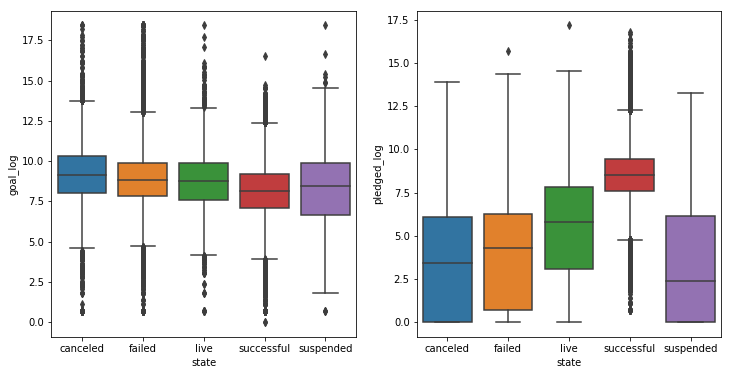

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(x='state', y="goal_log", data = df)

plt.subplot(122)
sns.boxplot(x='state', y="pledged_log", data = df)

plt.show()

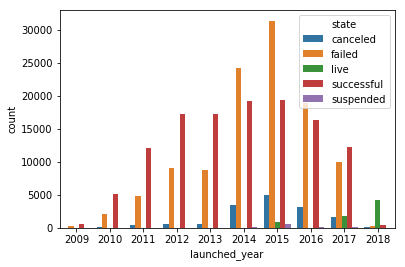

In [30]:
sns.countplot(x='launched_year', data = df, hue='state')
plt.show()

In [16]:
MSA_year= ['cbsa_name', 'category_broad']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[df['top100']==1][MSA_year[0]], df[df['top100']==1][MSA_year[1]]).style.background_gradient(cmap = cm)

category_broad,art,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
cbsa_name,,,,,,,,,,,,,,,
"Akron, OH",9,13,12,1,3,3,4,25,4,2,4,0,10,6,2
"Albany-Schenectady-Troy, NY",15,27,12,10,6,7,28,20,20,8,12,15,21,10,6
"Albuquerque, NM",9,12,3,8,5,6,20,8,11,6,5,6,15,13,12
"Allentown-Bethlehem-Easton, PA-NJ",9,11,12,7,6,0,25,19,20,16,13,6,14,20,14
"Atlanta-Sandy Springs-Roswell, GA",46,71,43,23,31,66,152,97,45,33,80,38,85,81,42
"Augusta-Richmond County, GA-SC",1,1,3,0,1,0,2,2,0,1,1,0,2,1,0
"Austin-Round Rock, TX",59,56,23,34,10,38,93,91,53,29,63,35,68,54,44
"Bakersfield, CA",3,7,6,0,1,1,6,5,4,0,4,1,5,4,3
"Baltimore-Columbia-Towson, MD",29,65,19,15,12,17,47,54,22,15,27,16,46,24,19


In [17]:
df_MSA = df[df.top100 == 1]

df_MSA.to_csv('kickstarter.csv')